# Decision Tree

#### Approach:
- Load the train and test data sets.
- Built a decision tree of depth 8 (no pruning).
- Used the test data for predicting and calculating the metrics.

    

In [1]:
import time
import sys
import os.path
import string

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

import pandas as pd
import numpy as np

In [2]:
# Getting data
def get_data(dataset):
    if os.path.isfile(dataset):
        print("Loading ", dataset, " dataset ...")
        data = pd.read_csv(dataset)
        print("\nDataset loaded successfully\n\n")
        return data
    else:
        print('File not found')
        print('\n\nExiting...')
        sys.exit()


In [3]:
#The column names are [a, b, c, ..., z, A, B, C, ..., W]
columnNames = list(string.ascii_lowercase) \
              + list(string.ascii_uppercase)[:23]

In [4]:
train_dataset = get_data('./sensIT_train.csv')
label_train = train_dataset['result']
train = train_dataset[columnNames]

Loading  ./sensIT_train.csv  dataset ...

Dataset loaded successfully




In [5]:
test_dataset = get_data('./sensIT_test.csv')
label_test = test_dataset['result']
test = test_dataset[columnNames]

Loading  ./sensIT_test.csv  dataset ...

Dataset loaded successfully




In [6]:
from sklearn.tree._tree import TREE_LEAF

def prune_index(inner_tree, index, threshold):
    if inner_tree.value[index].min() < threshold:
        # turn node into a leaf by "unlinking" its children
        inner_tree.children_left[index] = TREE_LEAF
        inner_tree.children_right[index] = TREE_LEAF
    # if there are shildren, visit them as well
    if inner_tree.children_left[index] != TREE_LEAF:
        prune_index(inner_tree, inner_tree.children_left[index], threshold)
        prune_index(inner_tree, inner_tree.children_right[index], threshold)

In [7]:
# Start building the Decision Tree
start_time = time.time()

dt = DecisionTreeClassifier(max_depth = 8, min_samples_leaf=500, random_state = 1)
dt.fit(train, label_train)
prune_index(dt.tree_, 0, 5)

# Finished building the tree
end = time.time()

In [8]:
# Predicting for the test data
pred = dt.predict(test)

In [9]:
def metrics(cm, cls, size):
    cm = np.array(cm)
    tp = cm[cls][cls]
    fp = sum(cm[x, cls] for x in range(3))-cm[cls][cls]
    fn = sum(cm[cls, x] for x in range(3))-cm[cls][cls]
    tn = size - tp - fp - fn
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    fmeasure = 2*(precision*recall)/(precision + recall)
    accuracy = (tp + tn)/size
    
    return precision, recall, fmeasure, accuracy

In [10]:
# Rows: Actual
# Cols: Predicted
# Classes: 1, 2, 3
cm = confusion_matrix(label_test, pred)
print("Confusion Matrix:\n ")
print(cm)

Confusion Matrix:
 
[[3028 1333  242]
 [1274 3140  896]
 [ 841 1642 7309]]


In [11]:
# Class 1
precision0, recall0, f0, acc0 = metrics(cm, 0, len(test))
print("        Precision Recall F-measure Accuracy")
print("Class 1: ", round(precision0, 3), "  ", round(recall0, 3), \
      " ", round(f0, 3), "   ", round(acc0,3))

        Precision Recall F-measure Accuracy
Class 1:  0.589    0.658   0.621     0.813


In [12]:
# Class 2
precision1, recall1, f1, acc1 = metrics(cm, 1, len(test))
print("        Precision Recall F-measure Accuracy")
print("Class 2: ", round(precision1, 3), "  ", round(recall1, 3), \
      " ", round(f1, 3), "   ", round(acc1,3))

        Precision Recall F-measure Accuracy
Class 2:  0.513    0.591   0.55     0.739


In [13]:
# Class 3
precision2, recall2, f2, acc2 = metrics(cm, 2, len(test))
print("        Precision Recall F-measure Accuracy")
print("Class 3: ", round(precision2, 3), "  ", round(recall2, 3), \
      " ", round(f2, 3), "   ", round(acc2,3))

        Precision Recall F-measure Accuracy
Class 3:  0.865    0.746   0.801     0.816


In [14]:
avg_p = (precision0 + precision1 + precision2)/3.0
avg_r = (recall0 + recall1 + recall2) / 3.0
avg_f = (f0 + f1 + f2) / 3.0
avg_a = (acc0 + acc1 + acc2)/ 3.0
print("        Precision Recall F-measure Accuracy")
print("Average: ", round(avg_p, 3), "  ", round(avg_r, 3), \
      " ", round(avg_f, 3), "   ", round(avg_a,3))

        Precision Recall F-measure Accuracy
Average:  0.656    0.665   0.658     0.789


In [15]:
# Number of instances correctly classified
acc_score = accuracy_score(pred, label_test)
print("Accuracy_score: ", round(acc_score, 4))
print("Training Time: %s secs" % round(end - start_time, 3))

Accuracy_score:  0.6839
Training Time: 2.982 secs


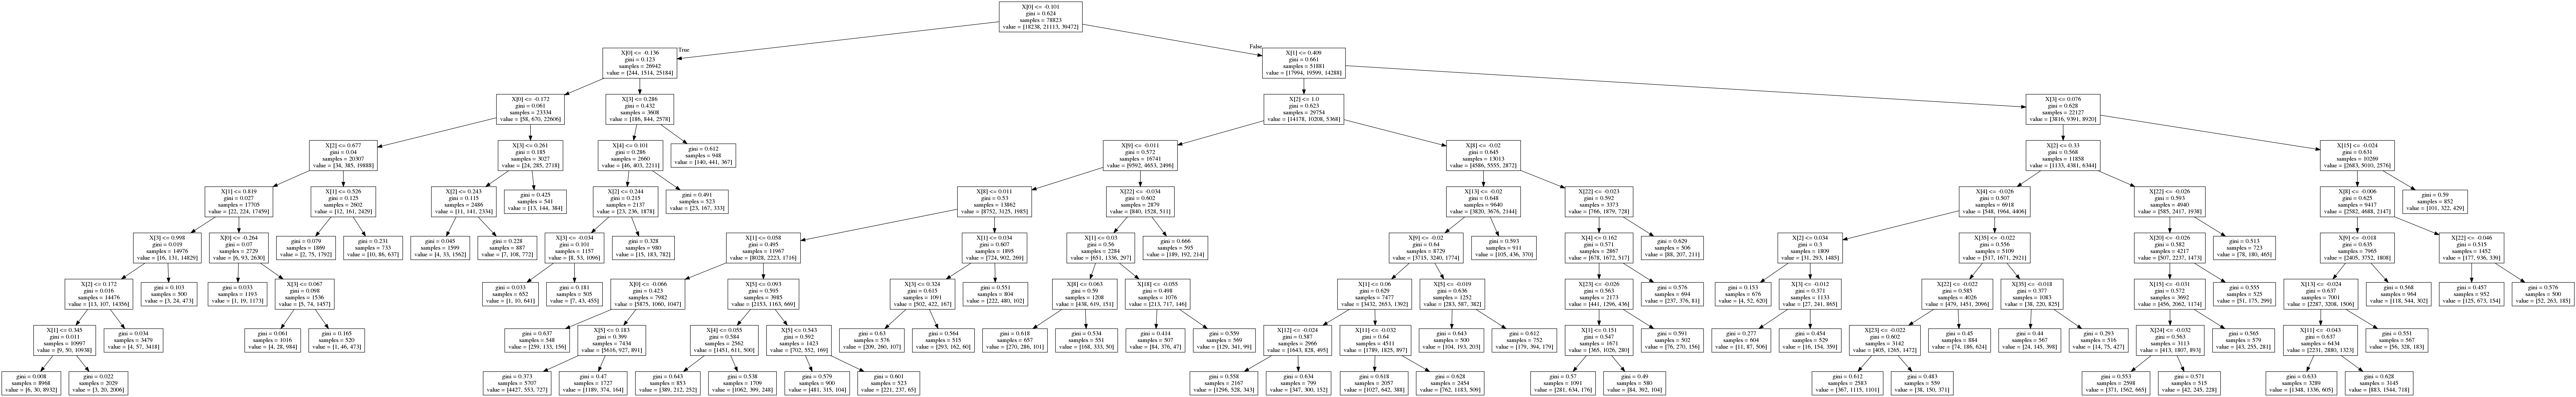

In [16]:
# Decision tree visualization
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())